# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](https://www.youtube.com/watch?v=3VBmLGUDxWA) to get a sense of how it works.  You can also search for a clip on YouTube. 

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [1]:
import pandas as pd
df = pd.read_csv("sharktank.csv")
df.head(10)

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,2.0,A Perfect Pear,Yes,Food and Beverage,Female,"$500,000",50%,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
6,1.0,2.0,Classroom Jams,Yes,Children / Education,Male,"$250,000",10%,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN
7,1.0,2.0,Lifebelt,No,Consumer Products,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,2.0,Crooked Jaw,No,Fashion / Beauty,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,2.0,Sticky Note Holder,No,Lifestyle / Home,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `sharktank.csv`. Read in the data into a Pandas `DataFrame`.

In [2]:
# YOUR CODE HERE
import pandas as pd
df = pd.read_csv("sharktank.csv")
df

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [3]:
# YOUR CODE HERE
import pandas as pd
df = pd.read_csv("sharktank.csv")
#df = df.Corcoran.astype(str)

#df.loc[ : , 'Name' ] = df.loc[ : , 'Name' ].fillna(0)
df.Corcoran = df.Corcoran.fillna(0)
df.Cuban = df.Cuban.fillna(0)
df.Greiner = df.Greiner.fillna(0)
df.Herjavec = df.Herjavec.fillna(0)
df.John = df.John.fillna(0)
df["O'Leary"] = df["O'Leary"].fillna(0)
df.Harrington = df.Harrington.fillna(0)
df.Guest = df.Guest.fillna(0)


df

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [4]:
# YOUR CODE HERE
import pandas as pd
df = pd.read_csv("sharktank.csv")
#df = df.Corcoran.astype(str)

#df.loc[ : , 'Name' ] = df.loc[ : , 'Name' ].fillna(0)
df.Corcoran = df.Corcoran.fillna(0)
df.Cuban = df.Cuban.fillna(0)
df.Greiner = df.Greiner.fillna(0)
df.Herjavec = df.Herjavec.fillna(0)
df.John = df.John.fillna(0)
df["O'Leary"] = df["O'Leary"].fillna(0)
df.Harrington = df.Harrington.fillna(0)
df.Guest = df.Guest.fillna(0)


#df [ 'Price' ] = df [ 'Price' ].str.replace( ',' , '' )
df['Amount'] = df['Amount'].str.replace("$", '')
df['Amount'] = df['Amount'].str.replace(",", '')
df['Equity'] = df['Equity'].str.replace("%", '')


#df [ 'Price' ] = df [ 'Price' ].fillna(0).astype(float)
df['Amount'] = df['Amount'].fillna(0).astype(float)
df['Equity'] = df['Equity'].fillna(0).astype(float)


df

/var/folders/pg/sqf9myss733_86tn8zcr1qtr0000gn/T/ipykernel_94403/657867877.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Amount'] = df['Amount'].str.replace("$", '')


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,50.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,100000.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,225000.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,300000.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \\$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \\$25,000 is \\$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [12]:
# YOUR CODE HERE
import pandas as pd
df = pd.read_csv("sharktank.csv")

#df.loc[ : , 'Name' ] = df.loc[ : , 'Name' ].fillna(0)
df.Corcoran = df.Corcoran.fillna(0)
df.Cuban = df.Cuban.fillna(0)
df.Greiner = df.Greiner.fillna(0)
df.Herjavec = df.Herjavec.fillna(0)
df.John = df.John.fillna(0)
df["O'Leary"] = df["O'Leary"].fillna(0)
df.Harrington = df.Harrington.fillna(0)
df.Guest = df.Guest.fillna(0)


#df [ 'Price' ] = df [ 'Price' ].str.replace( ',' , '' )
df['Amount'] = df['Amount'].str.replace("$", '')
df['Amount'] = df['Amount'].str.replace(",", '')
df['Equity'] = df['Equity'].str.replace("%", '')


#df [ 'Price' ] = df [ 'Price' ].fillna(0).astype(float)
df['Amount'] = df['Amount'].fillna(0).astype(float)
df['Equity'] = df['Equity'].fillna(0).astype(float)


#df = df [ df [ 'Equity' ] > 0 ]
df = df [ df [ 'Equity' ] > 0 ]

#df [ 'Valuation' ] = df [ 'Amount' ] / df [ 'Equity' ] * 100
df['Valuation'] = df['Amount'] / df['Equity']*100

#df = df.reset_index()
df = df.reset_index()

#df.iloc[ df [ 'Valuation' ].idxmax() ]
df.iloc[df['Amount'].idxmax()]

/var/folders/pg/sqf9myss733_86tn8zcr1qtr0000gn/T/ipykernel_94403/1743030576.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Amount'] = df['Amount'].str.replace("$", '')


index                                                                483
Season                                                               6.0
No. in series                                                       27.0
Company                                                           AirCar
Deal                                                                 Yes
Industry                                                 Green/CleanTech
Entrepreneur Gender                                                 Male
Amount                                                         5000000.0
Equity                                                              50.0
Corcoran                                                             0.0
Cuban                                                                0.0
Greiner                                                              0.0
Herjavec                                                             1.0
John                                               

Zipz was the most valuable company at $25,000,000. 
AirCar received the largest total investment from the shark(s) with $5,000,000.

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [6]:
# ENTER CODE HERE.
import pandas as pd
df = pd.read_csv("sharktank.csv")

df.Corcoran = df.Corcoran.fillna(0)
df.Cuban = df.Cuban.fillna(0)
df.Greiner = df.Greiner.fillna(0)
df.Herjavec = df.Herjavec.fillna(0)
df.John = df.John.fillna(0)
df["O'Leary"] = df["O'Leary"].fillna(0)
df.Harrington = df.Harrington.fillna(0)
df.Guest = df.Guest.fillna(0)

#df [ 'Price' ] = df [ 'Price' ].str.replace( ',' , '' )
df['Amount'] = df['Amount'].str.replace("$", '')
df['Amount'] = df['Amount'].str.replace(",", '')
df['Equity'] = df['Equity'].str.replace("%", '')


#df [ 'Price' ] = df [ 'Price' ].fillna(0).astype(float)
df['Amount'] = df['Amount'].fillna(0).astype(float)
df['Equity'] = df['Equity'].fillna(0).astype(float)


#df = df [ df [ 'Equity' ] > 0 ]
df = df [ df [ 'Equity' ] > 0 ]


#df [ 'Valuation' ] = df [ 'Amount' ] / df [ 'Equity' ] * 100
df['Valuation'] = df['Amount'] / df['Equity']*100

#df = df.reset_index()
df = df.reset_index()

#df.iloc[ df [ 'Valuation' ].idxmax() ]
df.iloc[df['Valuation'].idxmax()]



#QUESTION 2 CODE
#STEP 1
num_sharks = df.loc[ : , 'Corcoran' : 'Guest' ].sum(axis=1)
#df [ 'Corcoran' ] = df [ 'Corcoran' ] / num_sharks 
#df [ 'Cuban' ] = df [ 'Cuban' ] / num_sharks
# OR CAN USE
df.loc[ : , 'Corcoran':'Guest' ] = df.loc[ : , 'Corcoran':'Guest' ].divide( num_sharks , axis=0)

#STEP 2
#df [ 'Corcoran' ] = df [ 'Corcoran' ] * df [ 'Amount' ]
#df [ 'Cuban' ] = df [ 'Cuban' ] * df [ 'Amount' ]
#OR CAN USE
df.loc[ : , 'Corcoran':'Guest' ] = df.loc[ : , 'Corcoran':'Guest' ].multiply( df [ 'Amount' ], axis=0)


#STEP 3
df.loc[ : , 'Corcoran':'Guest' ].sum()

#df.max()


/var/folders/pg/sqf9myss733_86tn8zcr1qtr0000gn/T/ipykernel_94403/50781375.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Amount'] = df['Amount'].str.replace("$", '')


Corcoran       4912500.0
Cuban         17742500.0
Greiner        8132500.0
Herjavec      16110000.0
John           8116500.0
O'Leary        7365000.0
Harrington      800000.0
Guest           400000.0
dtype: float64

The shark who invested the most across 6 seasons is Cuban at $17,742,500.00

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

Industry
Business Services         3
Children / Education     29
Consumer Products        10
Fashion / Beauty         43
Fitness / Sports         23
Food and Beverage        54
Green/CleanTech           5
Healthcare               10
Lifestyle / Home         37
Media / Entertainment     6
Pet Products              7
Software / Tech          13
Uncertain / Other         5
Name: Equity, dtype: int64


<AxesSubplot:xlabel='Industry'>

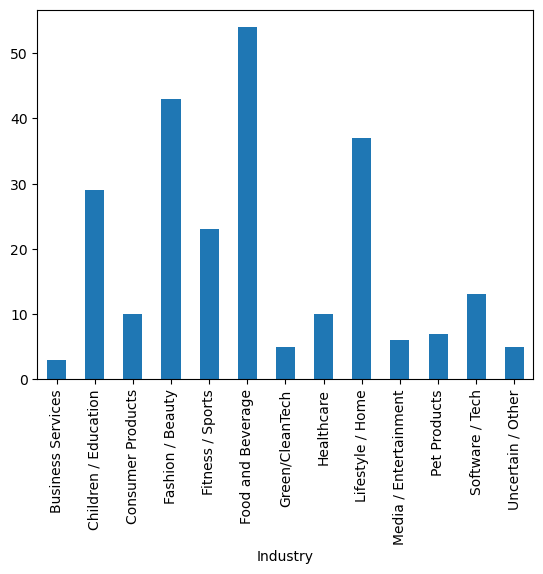

In [7]:
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd
df = pd.read_csv("sharktank.csv")


df_group = df.groupby( 'Industry' )[ 'Equity' ].count()
print(df_group)

#plt.bar(df_group.index,df_group)
#plt.show()


df_group.plot(kind='bar')

Sharks mostly invested in everyday needs and desires such as Food & Beverages, Fashion & Beauty, and Lifestyle/Home. Food & Beverages was the Industry the sharks mostly invested in.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the Notebook (ipynb) to canvas (one submission per group).

4. Demo your lab by next Tuesday for full credit.